# I] Import functions and options

In [1]:
import pandas, numpy, seaborn
import matplotlib, matplotlib.pyplot as plt

matplotlib.rcParams.update({'svg.fonttype' : 'none'})

pandas.options.mode.chained_assignment = None  # default='warn'

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] Data download

In [11]:
path = 'dataframes_for_input/Gene expression/'

### Zscore expression

In [12]:
%%time
# DL normalized ATG7 isoform expression
df = pandas.read_csv(output_file_directory+ path + 'zscore_df_norm.tsv', sep = '\t')
df= df.rename(columns = {'Unnamed: 0' : 'ensembl_gene_id'})
df = df.dropna(axis=0)
print(df.shape)
df.head()

(19364, 5904)
Wall time: 44.7 s


,ensembl_gene_id,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2226-SM-5N9CH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-3026-SM-5GZYU,...,GTEX-ZZPU-0326-SM-5N9BJ,GTEX-ZZPU-0526-SM-5E44U,GTEX-ZZPU-0726-SM-5N9C8,GTEX-ZZPU-0926-SM-5GZYT,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2726-SM-5NQ8O
0,ENSG00000198888,1.190884,0.898610,-0.272200,-0.031037,0.898610,-3.494575,-1.226637,1.333401,0.898610,...,0.765988,0.352102,-1.652882,0.765988,0.641517,-0.031037,0.352102,-0.272200,-1.038047,0.898610
1,ENSG00000198763,-0.277555,-0.774308,0.625942,-0.074143,0.625942,-4.268193,0.259062,0.625942,-0.074143,...,0.097681,0.097681,-2.623235,-0.277555,0.259062,-0.074143,0.097681,-0.074143,-1.938165,0.809955
2,ENSG00000198804,-0.152273,-0.800803,-2.507672,0.295997,-1.238498,-3.555058,-2.701759,-0.152273,0.532137,...,0.413822,0.413822,-1.116376,0.829227,0.829227,0.829227,0.413822,0.295997,0.061081,0.532137
3,ENSG00000198712,-0.802258,-0.601867,-1.885034,-0.388352,-0.802258,-6.763979,-2.885276,-0.802258,0.082193,...,0.571510,0.311639,-3.506269,0.311639,0.082193,-0.146301,0.571510,-0.802258,0.082193,-0.146301
4,ENSG00000228253,0.462616,0.462616,0.462616,0.462616,0.462616,-1.259366,0.462616,0.462616,0.462616,...,0.462616,0.462616,-2.288038,0.462616,0.462616,0.462616,0.462616,0.462616,-0.690261,0.462616


### Protein coding list: To get symbol

In [13]:
%%time
#download the protein coding list. will be useful with correlation results.
protein_coding_df= pandas.read_csv(input_file_directory + "protein_coding_list.txt" , sep = "\t")
print(protein_coding_df.shape)
protein_coding_df.head()

(22796, 4)
Wall time: 49.9 ms


,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
1,ENSG00000198888,MT-ND1,4535.0,protein_coding
2,ENSG00000198763,MT-ND2,4536.0,protein_coding
3,ENSG00000198804,MT-CO1,4512.0,protein_coding
4,ENSG00000198712,MT-CO2,4513.0,protein_coding
5,ENSG00000228253,MT-ATP8,4509.0,protein_coding


### GTEx info: To have all subgroup tissues

In [14]:
#download the protein coding list.
GTEx_info = pandas.read_csv(input_file_directory+"GTEX_info.tsv", sep = "\t", index_col=0)
print(GTEx_info.shape)
GTEx_info.head()

(9783, 5)


,body_site_detail (SMTSD),_primary_site,_gender,_patient,_cohort
sample,,,,,
GTEX-1117F-0226-SM-5GZZ7,Adipose - Subcutaneous,Adipose Tissue,female,GTEX-1117F,GTEX
GTEX-1117F-0426-SM-5EGHI,Muscle - Skeletal,Muscle,female,GTEX-1117F,GTEX
GTEX-1117F-0526-SM-5EGHJ,Artery - Tibial,Blood Vessel,female,GTEX-1117F,GTEX
GTEX-1117F-0626-SM-5N9CS,Artery - Coronary,Blood Vessel,female,GTEX-1117F,GTEX
GTEX-1117F-0726-SM-5GIEN,Heart - Atrial Appendage,Heart,female,GTEX-1117F,GTEX


### Filtered tissues list

In [15]:
#Download the filtered sample list
path = "samples_IDs/genes_expression/"
samples_list_normal= numpy.loadtxt(input_file_directory+path+'filtered_samples_list_normal.tsv', delimiter="\t", dtype=str)

print(len(samples_list_normal))

5903


## III] Data transformation

In [16]:
# Merge to have symbol names, delete the rest
df = protein_coding_df.merge(df)
df = df.drop(['ensembl_gene_id','entrezgene_id', 'transcript_biotype'], axis =1)
print(df.shape)
df.head()

(19507, 5904)


,hgnc_symbol,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2226-SM-5N9CH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-3026-SM-5GZYU,...,GTEX-ZZPU-0326-SM-5N9BJ,GTEX-ZZPU-0526-SM-5E44U,GTEX-ZZPU-0726-SM-5N9C8,GTEX-ZZPU-0926-SM-5GZYT,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2726-SM-5NQ8O
0,MT-ND1,1.190884,0.898610,-0.272200,-0.031037,0.898610,-3.494575,-1.226637,1.333401,0.898610,...,0.765988,0.352102,-1.652882,0.765988,0.641517,-0.031037,0.352102,-0.272200,-1.038047,0.898610
1,MT-ND2,-0.277555,-0.774308,0.625942,-0.074143,0.625942,-4.268193,0.259062,0.625942,-0.074143,...,0.097681,0.097681,-2.623235,-0.277555,0.259062,-0.074143,0.097681,-0.074143,-1.938165,0.809955
2,MT-CO1,-0.152273,-0.800803,-2.507672,0.295997,-1.238498,-3.555058,-2.701759,-0.152273,0.532137,...,0.413822,0.413822,-1.116376,0.829227,0.829227,0.829227,0.413822,0.295997,0.061081,0.532137
3,MT-CO2,-0.802258,-0.601867,-1.885034,-0.388352,-0.802258,-6.763979,-2.885276,-0.802258,0.082193,...,0.571510,0.311639,-3.506269,0.311639,0.082193,-0.146301,0.571510,-0.802258,0.082193,-0.146301
4,MT-ATP8,0.462616,0.462616,0.462616,0.462616,0.462616,-1.259366,0.462616,0.462616,0.462616,...,0.462616,0.462616,-2.288038,0.462616,0.462616,0.462616,0.462616,0.462616,-0.690261,0.462616


In [17]:
#to know the ensembl codes for the targets
targets = 'PINK1', 'PRKN', 'POLG', 'USP30', 'OPTN', 'TBK1', 'RB1CC1', 'SQSTM1' , 'CALCOCO2'

for target in targets:
    print(protein_coding_df.loc[protein_coding_df['hgnc_symbol'] == target], '\n')

       ensembl_gene_id hgnc_symbol  entrezgene_id transcript_biotype
19333  ENSG00000158828       PINK1        65018.0     protein_coding 

       ensembl_gene_id hgnc_symbol  entrezgene_id transcript_biotype
10924  ENSG00000185345        PRKN         5071.0     protein_coding 

       ensembl_gene_id hgnc_symbol  entrezgene_id transcript_biotype
14823  ENSG00000140521        POLG         5428.0     protein_coding 

       ensembl_gene_id hgnc_symbol  entrezgene_id transcript_biotype
12998  ENSG00000135093       USP30        84749.0     protein_coding 

      ensembl_gene_id hgnc_symbol  entrezgene_id transcript_biotype
3324  ENSG00000123240        OPTN        10133.0     protein_coding 

       ensembl_gene_id hgnc_symbol  entrezgene_id transcript_biotype
19740  ENSG00000183735        TBK1        29110.0     protein_coding 

       ensembl_gene_id hgnc_symbol  entrezgene_id transcript_biotype
10910  ENSG00000023287      RB1CC1         9821.0     protein_coding 

       ensembl_gene_id

In [30]:
df.set_index("hgnc_symbol", inplace=True, drop=True)
df = df.loc[targets, :]
df

,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2226-SM-5N9CH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-3026-SM-5GZYU,GTEX-111CU-0126-SM-5GZWZ,...,GTEX-ZZPU-0326-SM-5N9BJ,GTEX-ZZPU-0526-SM-5E44U,GTEX-ZZPU-0726-SM-5N9C8,GTEX-ZZPU-0926-SM-5GZYT,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2726-SM-5NQ8O
hgnc_symbol,,,,,,,,,,,,,,,,,,,,,
PINK1,-0.034792,-0.808959,-0.203189,0.388616,-0.811726,-1.173416,-0.763821,-0.333851,-0.285229,1.521120,...,-1.062559,-0.885903,-0.772949,1.582175,1.518145,-0.135663,0.472094,-0.608421,0.388616,0.283429
PRKN,0.025890,0.674704,-0.034352,1.382501,0.540940,-0.323986,-0.437273,-0.008163,-0.302552,0.577476,...,-0.563242,-0.978305,-1.235141,2.551724,0.608273,-1.037087,1.392073,0.168280,-1.218270,0.347231
POLG,0.751136,-0.103563,-0.021810,-1.008489,-0.533838,-2.828339,0.799228,1.294515,0.088947,-0.560118,...,-0.468563,-0.072368,0.198475,-0.786206,-0.581835,0.110887,-0.776113,-0.581835,-0.374992,0.481190
USP30,0.231250,0.985217,-0.596247,-0.954159,-0.593741,0.750701,-0.837553,-0.285848,-0.768609,0.617830,...,-1.076959,-1.450132,0.346827,-0.509196,0.952207,0.120474,-0.823664,0.688087,-0.979544,1.249053
OPTN,1.020808,1.447630,0.099601,0.927355,0.753684,0.803672,-0.697745,0.411625,-0.380410,0.097547,...,-0.547390,-0.788992,-0.756104,1.066811,0.474369,-1.336023,-0.050946,0.624050,0.169242,1.438995
TBK1,1.372466,1.495301,0.164679,-0.243130,0.911160,1.549488,-0.045373,-0.006115,-0.500753,2.663051,...,0.029290,-0.221459,-1.159626,-0.867553,1.131950,0.172548,0.541703,0.005704,-0.074892,0.135340
RB1CC1,1.359371,1.006257,-1.058736,-0.778006,0.120875,0.927162,0.290103,-0.470917,-0.814506,-0.899511,...,-1.308403,-0.495829,-0.164128,1.039142,-0.295188,-0.076802,0.753109,0.103192,-0.433159,1.094024
SQSTM1,0.786722,0.907328,0.062395,0.010070,1.382407,0.614975,-0.528230,1.394213,0.324717,2.000535,...,-0.122913,0.387235,0.426609,-0.050489,2.338919,1.581344,1.019083,0.143471,-0.910321,0.871949
CALCOCO2,1.106588,1.959069,0.482299,0.857613,1.125532,1.359361,-0.096321,0.853059,0.196634,-0.526970,...,-0.134531,0.265267,-0.500346,1.511279,-0.606334,0.639943,1.322068,0.604124,-0.000284,1.511279


In [31]:
#group the two df to have all information. Need subgroup of tissues
df = pandas.concat([GTEx_info.T, df], axis=0)

# The merge added many columns of samples. Only keep the filtered ones
df = df[samples_list_normal]
print(df.shape)

df

(14, 5903)


,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2226-SM-5N9CH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-3026-SM-5GZYU,GTEX-111CU-0126-SM-5GZWZ,...,GTEX-ZZPU-0326-SM-5N9BJ,GTEX-ZZPU-0526-SM-5E44U,GTEX-ZZPU-0726-SM-5N9C8,GTEX-ZZPU-0926-SM-5GZYT,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2726-SM-5NQ8O
body_site_detail (SMTSD),Adipose - Subcutaneous,Artery - Tibial,Artery - Coronary,Heart - Atrial Appendage,Adipose - Visceral (Omentum),Ovary,Uterus,Breast - Mammary Tissue,Minor Salivary Gland,Adrenal Gland,...,Adipose - Visceral (Omentum),Lung,Pancreas,Heart - Left Ventricle,Adrenal Gland,Thyroid,Esophagus - Muscularis,Ovary,Vagina,Adipose - Subcutaneous
_primary_site,Adipose Tissue,Blood Vessel,Blood Vessel,Heart,Adipose Tissue,Ovary,Uterus,Breast,Salivary Gland,Adrenal Gland,...,Adipose Tissue,Lung,Pancreas,Heart,Adrenal Gland,Thyroid,Esophagus,Ovary,Vagina,Adipose Tissue
_gender,female,female,female,female,female,female,female,female,female,male,...,female,female,female,female,female,female,female,female,female,female
_patient,GTEX-1117F,GTEX-1117F,GTEX-1117F,GTEX-1117F,GTEX-1117F,GTEX-1117F,GTEX-1117F,GTEX-1117F,GTEX-1117F,GTEX-111CU,...,GTEX-ZZPU,GTEX-ZZPU,GTEX-ZZPU,GTEX-ZZPU,GTEX-ZZPU,GTEX-ZZPU,GTEX-ZZPU,GTEX-ZZPU,GTEX-ZZPU,GTEX-ZZPU
_cohort,GTEX,GTEX,GTEX,GTEX,GTEX,GTEX,GTEX,GTEX,GTEX,GTEX,...,GTEX,GTEX,GTEX,GTEX,GTEX,GTEX,GTEX,GTEX,GTEX,GTEX
PINK1,-0.034792,-0.808959,-0.203189,0.388616,-0.811726,-1.173416,-0.763821,-0.333851,-0.285229,1.52112,...,-1.062559,-0.885903,-0.772949,1.582175,1.518145,-0.135663,0.472094,-0.608421,0.388616,0.283429
PRKN,0.02589,0.674704,-0.034352,1.382501,0.54094,-0.323986,-0.437273,-0.008163,-0.302552,0.577476,...,-0.563242,-0.978305,-1.235141,2.551724,0.608273,-1.037087,1.392073,0.16828,-1.21827,0.347231
POLG,0.751136,-0.103563,-0.02181,-1.008489,-0.533838,-2.828339,0.799228,1.294515,0.088947,-0.560118,...,-0.468563,-0.072368,0.198475,-0.786206,-0.581835,0.110887,-0.776113,-0.581835,-0.374992,0.48119
USP30,0.23125,0.985217,-0.596247,-0.954159,-0.593741,0.750701,-0.837553,-0.285848,-0.768609,0.61783,...,-1.076959,-1.450132,0.346827,-0.509196,0.952207,0.120474,-0.823664,0.688087,-0.979544,1.249053
OPTN,1.020808,1.44763,0.099601,0.927355,0.753684,0.803672,-0.697745,0.411625,-0.38041,0.097547,...,-0.54739,-0.788992,-0.756104,1.066811,0.474369,-1.336023,-0.050946,0.62405,0.169242,1.438995


In [32]:
df = df.T
df.head()

,body_site_detail (SMTSD),_primary_site,_gender,_patient,_cohort,PINK1,PRKN,POLG,USP30,OPTN,TBK1,RB1CC1,SQSTM1,CALCOCO2
GTEX-1117F-0226-SM-5GZZ7,Adipose - Subcutaneous,Adipose Tissue,female,GTEX-1117F,GTEX,-0.034792,0.02589,0.751136,0.23125,1.020808,1.372466,1.359371,0.786722,1.106588
GTEX-1117F-0526-SM-5EGHJ,Artery - Tibial,Blood Vessel,female,GTEX-1117F,GTEX,-0.808959,0.674704,-0.103563,0.985217,1.44763,1.495301,1.006257,0.907328,1.959069
GTEX-1117F-0626-SM-5N9CS,Artery - Coronary,Blood Vessel,female,GTEX-1117F,GTEX,-0.203189,-0.034352,-0.02181,-0.596247,0.099601,0.164679,-1.058736,0.062395,0.482299
GTEX-1117F-0726-SM-5GIEN,Heart - Atrial Appendage,Heart,female,GTEX-1117F,GTEX,0.388616,1.382501,-1.008489,-0.954159,0.927355,-0.24313,-0.778006,0.01007,0.857613
GTEX-1117F-1326-SM-5EGHH,Adipose - Visceral (Omentum),Adipose Tissue,female,GTEX-1117F,GTEX,-0.811726,0.54094,-0.533838,-0.593741,0.753684,0.91116,0.120875,1.382407,1.125532


## IV] Data visualization and filtration

In [33]:
# Primary Sites
df['_primary_site'].value_counts()

Brain              818
Esophagus          629
Blood Vessel       603
Skin               544
Adipose Tissue     510
Colon              295
Lung               285
Thyroid            278
Nerve              278
Breast             179
Testis             157
Muscle             150
Heart              122
Adrenal Gland      121
Stomach            119
Pituitary          107
Prostate            99
Spleen              97
Small Intestine     90
Ovary               88
Vagina              84
Uterus              78
Salivary Gland      53
Pancreas            36
Liver               27
Kidney              15
Blood               13
Cervix Uteri        10
Bladder              9
Fallopian Tube       5
<not provided>       4
Name: _primary_site, dtype: int64

In [34]:
# Subgrouped Sites
df['body_site_detail (SMTSD)'].value_counts()

Skin - Sun Exposed (Lower leg)               318
Adipose - Subcutaneous                       317
Lung                                         285
Artery - Tibial                              281
Thyroid                                      278
Nerve - Tibial                               278
Esophagus - Mucosa                           257
Esophagus - Muscularis                       239
Skin - Not Sun Exposed (Suprapubic)          227
Artery - Aorta                               204
Adipose - Visceral (Omentum)                 193
Breast - Mammary Tissue                      179
Colon - Transverse                           157
Testis                                       157
Muscle - Skeletal                            150
Colon - Sigmoid                              138
Esophagus - Gastroesophageal Junction        135
Adrenal Gland                                121
Stomach                                      120
Brain - Cerebellum                           118
Artery - Coronary   

In [35]:
# we can see 150 muscle - skeletal. And 150 muscles.  So all the muscles are skeletal
df['_primary_site'].replace('Muscle', 'Muscle - Skeletal ', inplace=True)

In [36]:
#Remove tissues with lower than 20 samples. 
element_to_delete = []
#select all the elements in primary sites, and note which one are <20
working_elements = df["body_site_detail (SMTSD)"].to_list()
for element in working_elements:
    if working_elements.count(element) < 20:
        element_to_delete.append(element)

#Convert to Set() to have a clear list 
element_to_delete = set(element_to_delete)
print('elements with less than 20 samples are:', element_to_delete)

#Remove the samples where the tissue is represented less than 20 times
print('shape with all the elements', df.shape)
for element in element_to_delete:
    df = df.loc[df["body_site_detail (SMTSD)"] != element]
print('shape after removing the elements', df.shape)

elements with less than 20 samples are: {'Bladder', 'Whole Blood', 'Cervix - Endocervix', 'Cervix - Ectocervix', 'Kidney - Cortex', 'Fallopian Tube'}
shape with all the elements (5903, 14)
shape after removing the elements (5851, 14)


###  Group with Primary Site or Subgrouped sited

#### Group by primary site

In [51]:
df.head(3)

,body_site_detail (SMTSD),_primary_site,_gender,_patient,_cohort,PINK1,PRKN,POLG,USP30,OPTN,TBK1,RB1CC1,SQSTM1,CALCOCO2
GTEX-1117F-0226-SM-5GZZ7,Adipose - Subcutaneous,Adipose Tissue,female,GTEX-1117F,GTEX,-0.034792,0.02589,0.751136,0.23125,1.020808,1.372466,1.359371,0.786722,1.106588
GTEX-1117F-0526-SM-5EGHJ,Artery - Tibial,Blood Vessel,female,GTEX-1117F,GTEX,-0.808959,0.674704,-0.103563,0.985217,1.44763,1.495301,1.006257,0.907328,1.959069
GTEX-1117F-0626-SM-5N9CS,Artery - Coronary,Blood Vessel,female,GTEX-1117F,GTEX,-0.203189,-0.034352,-0.02181,-0.596247,0.099601,0.164679,-1.058736,0.062395,0.482299


In [65]:
## Group by primary_site
selected_columns = list(targets).copy()
selected_columns.append('_primary_site')

df_sites = df.loc[:, selected_columns] 
df_sites.reset_index(inplace=True, drop=True)

# add n= in a new column
n_egal = []
length = len(df_sites)
for i in range(length):
    value = df_sites [df_sites['_primary_site'] == df_sites['_primary_site'][i]].count()  
    n_egal.append(value[1])
    
print(n_egal[:8])

# add parenthesis, more esthetic
n_egal_with_par = []
for element in n_egal:
    element_par = f'({element})'
    n_egal_with_par.append(element_par)

df_sites['nb sample per site'] = n_egal_with_par
      
# pull the two columns and select only needed ones
df_sites['_primary_site'] = df_sites[['_primary_site', 'nb sample per site']].agg(' '.join, axis=1)
df_sites = df_sites.loc[:, selected_columns]
df_sites.head()

[510, 603, 603, 122, 510, 88, 78, 179]


,PINK1,PRKN,POLG,USP30,OPTN,TBK1,RB1CC1,SQSTM1,CALCOCO2,_primary_site
0,-0.034792,0.02589,0.751136,0.23125,1.020808,1.372466,1.359371,0.786722,1.106588,Adipose Tissue (510)
1,-0.808959,0.674704,-0.103563,0.985217,1.44763,1.495301,1.006257,0.907328,1.959069,Blood Vessel (603)
2,-0.203189,-0.034352,-0.02181,-0.596247,0.099601,0.164679,-1.058736,0.062395,0.482299,Blood Vessel (603)
3,0.388616,1.382501,-1.008489,-0.954159,0.927355,-0.24313,-0.778006,0.01007,0.857613,Heart (122)
4,-0.811726,0.54094,-0.533838,-0.593741,0.753684,0.91116,0.120875,1.382407,1.125532,Adipose Tissue (510)


In [66]:
# Four samples are not referenced
df_sites = df_sites[df_sites['_primary_site'] != '<not provided> (4)']

In [67]:
#GroupBy and sort by PINK1 expression
df_sites = df_sites.groupby('_primary_site').agg(numpy.mean)
df_sites = df_sites.sort_values('PINK1', ascending=False)

df_sites

,PINK1,PRKN,POLG,USP30,OPTN,TBK1,RB1CC1,SQSTM1,CALCOCO2
_primary_site,,,,,,,,,
Muscle - Skeletal (150),1.814207,2.502735,0.079128,0.666638,3.935487,1.536390,1.974873,2.139606,0.661168
Brain (818),1.466774,0.883290,-0.911763,0.832115,-0.087776,-0.753597,1.154999,-0.801533,-1.682521
Adrenal Gland (121),1.450759,0.734992,-0.444550,1.081608,0.342275,1.447863,-0.395778,1.862999,-0.499507
Testis (157),1.084929,0.303190,-1.572736,2.030709,0.691775,0.868617,0.235041,-2.202240,0.936754
Heart (122),0.701862,1.822452,-0.676935,-0.674622,0.438899,-0.638242,0.103855,0.034913,0.708356
Colon (295),-0.064466,-0.190031,0.402488,-0.049251,-0.283727,-0.210663,-0.383648,-0.084294,0.186169
Liver (27),-0.090578,-0.814294,0.575303,0.728411,-0.480511,0.485802,-0.483986,0.124909,-0.894532
Esophagus (629),-0.100974,-0.155742,0.198482,-0.817879,-0.294082,0.050767,-0.010708,-0.143923,0.324425
Nerve (278),-0.191767,-0.484175,0.941179,-0.260329,-0.039399,-0.139091,-0.503324,-0.051821,0.824628


#### group by Subgrouped site

In [68]:
selected_columns = list(targets).copy()
selected_columns.append('body_site_detail (SMTSD)')

## Same for SubGrouped Site
df_subg = df.loc[:, selected_columns] 
df_subg.reset_index(inplace=True, drop=True)

# add n= in a new column
length = len(df_subg)
n_egal = []
for i in range(length):
    value = df_subg [df_subg['body_site_detail (SMTSD)'] == df_subg['body_site_detail (SMTSD)'][i]].count()  
    n_egal.append(value[1])
    
print(n_egal[:8])

# add parenthesis, more esthetic
n_egal_with_par = []
for element in n_egal:
    element_par = f'({element})'
    n_egal_with_par.append(element_par)
    
df_subg['nb sample per site'] = n_egal_with_par

# pull the column with tissue name and n= 
df_subg['body_site_detail (SMTSD)'] = df_subg[['body_site_detail (SMTSD)', 'nb sample per site']].agg(' '.join, axis=1)
df_subg = df_subg.loc[:, selected_columns] 
df_subg.head()

[317, 281, 118, 87, 193, 88, 78, 179]


,PINK1,PRKN,POLG,USP30,OPTN,TBK1,RB1CC1,SQSTM1,CALCOCO2,body_site_detail (SMTSD)
0,-0.034792,0.02589,0.751136,0.23125,1.020808,1.372466,1.359371,0.786722,1.106588,Adipose - Subcutaneous (317)
1,-0.808959,0.674704,-0.103563,0.985217,1.44763,1.495301,1.006257,0.907328,1.959069,Artery - Tibial (281)
2,-0.203189,-0.034352,-0.02181,-0.596247,0.099601,0.164679,-1.058736,0.062395,0.482299,Artery - Coronary (118)
3,0.388616,1.382501,-1.008489,-0.954159,0.927355,-0.24313,-0.778006,0.01007,0.857613,Heart - Atrial Appendage (87)
4,-0.811726,0.54094,-0.533838,-0.593741,0.753684,0.91116,0.120875,1.382407,1.125532,Adipose - Visceral (Omentum) (193)


In [69]:
#GroupBy and sort by PINK1 expression
df_subg = df_subg.groupby('body_site_detail (SMTSD)').agg(numpy.mean)
df_subg = df_subg.sort_values('PINK1', ascending=False)

df_subg

,PINK1,PRKN,POLG,USP30,OPTN,TBK1,RB1CC1,SQSTM1,CALCOCO2
body_site_detail (SMTSD),,,,,,,,,
Brain - Cortex (95),2.102397,1.274955,-0.541372,0.729321,0.026230,-0.816658,2.101798,-0.786711,-1.721484
Brain - Frontal Cortex (BA9) (83),2.081281,1.524534,-1.210931,0.511190,0.362634,-0.457914,2.326803,-0.831936,-1.839687
Brain - Substantia nigra (34),1.976012,0.350532,-1.199503,0.751187,0.379440,-0.578049,0.342623,-0.832109,-1.081872
Brain - Anterior cingulate cortex (BA24) (54),1.952597,1.459986,-1.269286,0.462626,0.217897,-0.776182,2.480537,-0.955297,-1.733101
Brain - Putamen (basal ganglia) (35),1.929036,1.379899,-1.338423,0.566365,-0.249802,-1.430846,0.858766,-0.988137,-1.730868
Muscle - Skeletal (150),1.814207,2.502735,0.079128,0.666638,3.935487,1.536390,1.974873,2.139606,0.661168
Brain - Nucleus accumbens (basal ganglia) (72),1.810454,1.461239,-1.466397,0.574947,-0.692736,-1.772005,0.534935,-1.027672,-1.878680
Brain - Amygdala (27),1.803783,0.596640,-1.442954,0.479653,0.069215,-1.354877,1.816611,-1.072459,-1.476867
Brain - Caudate (basal ganglia) (69),1.737953,1.309590,-1.507639,0.420994,-0.369283,-1.603856,0.750336,-0.982717,-1.565544


## V] Heatmap

In [24]:
path2 = 'singh_et_al/'

#### 1) All primary site

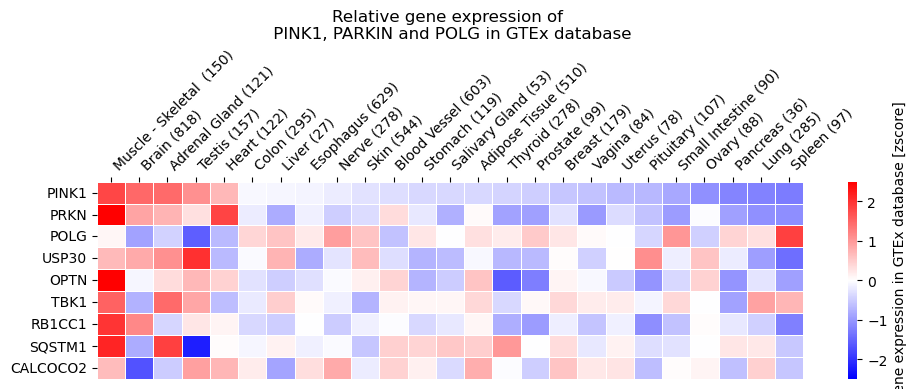

In [70]:
plt.subplots(figsize=(10,4))
ax = seaborn.heatmap(df_sites.T, cmap="bwr", linewidths=.5, center=0, vmin=-2.5, vmax=2.5,
               cbar_kws={'label': 'Relative gene expression in GTEx database [zscore]'})
plt.title('Relative gene expression of \n PINK1, PARKIN and POLG in GTEx database')
plt.yticks(rotation = 0)

ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

plt.xticks(rotation = 45, ha = 'left')
plt.tight_layout()

# title_file = 'hm_primary_site_expression'
# plt.savefig(output_file_directory+path2+title_file+'_.svg')

plt.show()

#### 2) All Subgrouped tissues

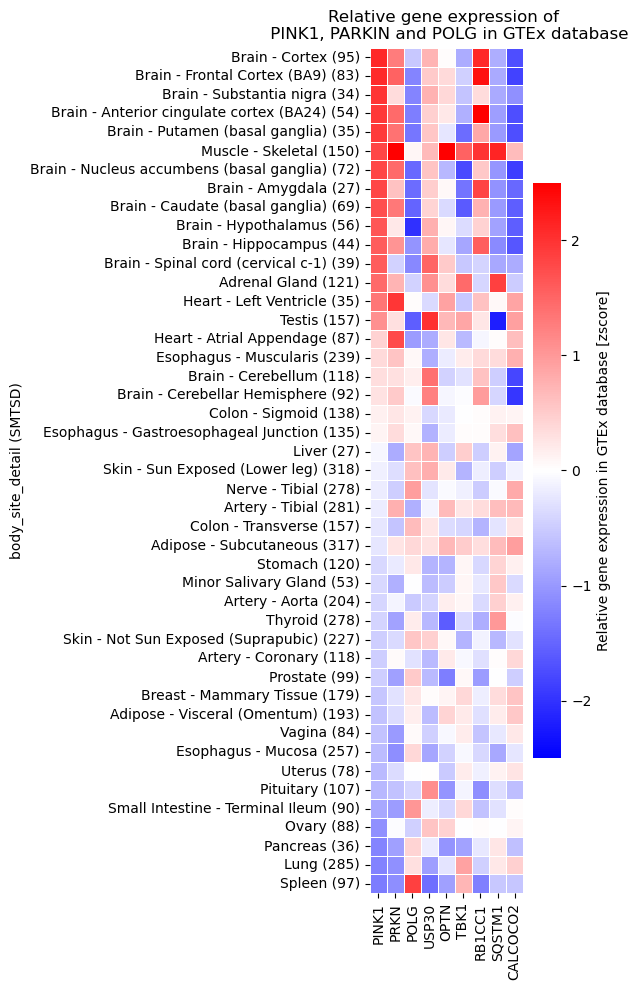

In [85]:
plt.subplots(figsize=(6,10))

seaborn.heatmap(df_subg, cmap="bwr", linewidths=.5, center=0, vmin=-2.5, vmax=2.5,
               cbar_kws={'label': 'Relative gene expression in GTEx database [zscore]'})
plt.title('Relative gene expression of \n PINK1, PARKIN and POLG in GTEx database')
plt.xticks(rotation=90)
plt.tight_layout()


# title_file = 'hm_subgroup_site_expression'
# plt.savefig(output_file_directory+path2+title_file+'_.svg')

plt.show()

#### 3) Only brain subtissues 

In [73]:
df_subg_Brain = df_subg[df_subg.index.str.contains('Brain')]
df_subg_Brain

,PINK1,PRKN,POLG,USP30,OPTN,TBK1,RB1CC1,SQSTM1,CALCOCO2
body_site_detail (SMTSD),,,,,,,,,
Brain - Cortex (95),2.102397,1.274955,-0.541372,0.729321,0.026230,-0.816658,2.101798,-0.786711,-1.721484
Brain - Frontal Cortex (BA9) (83),2.081281,1.524534,-1.210931,0.511190,0.362634,-0.457914,2.326803,-0.831936,-1.839687
Brain - Substantia nigra (34),1.976012,0.350532,-1.199503,0.751187,0.379440,-0.578049,0.342623,-0.832109,-1.081872
Brain - Anterior cingulate cortex (BA24) (54),1.952597,1.459986,-1.269286,0.462626,0.217897,-0.776182,2.480537,-0.955297,-1.733101
Brain - Putamen (basal ganglia) (35),1.929036,1.379899,-1.338423,0.566365,-0.249802,-1.430846,0.858766,-0.988137,-1.730868
Brain - Nucleus accumbens (basal ganglia) (72),1.810454,1.461239,-1.466397,0.574947,-0.692736,-1.772005,0.534935,-1.027672,-1.878680
Brain - Amygdala (27),1.803783,0.596640,-1.442954,0.479653,0.069215,-1.354877,1.816611,-1.072459,-1.476867
Brain - Caudate (basal ganglia) (69),1.737953,1.309590,-1.507639,0.420994,-0.369283,-1.603856,0.750336,-0.982717,-1.565544
Brain - Hypothalamus (56),1.646588,0.218439,-2.026145,0.773912,0.095072,-0.347811,0.435310,-0.899177,-1.574747


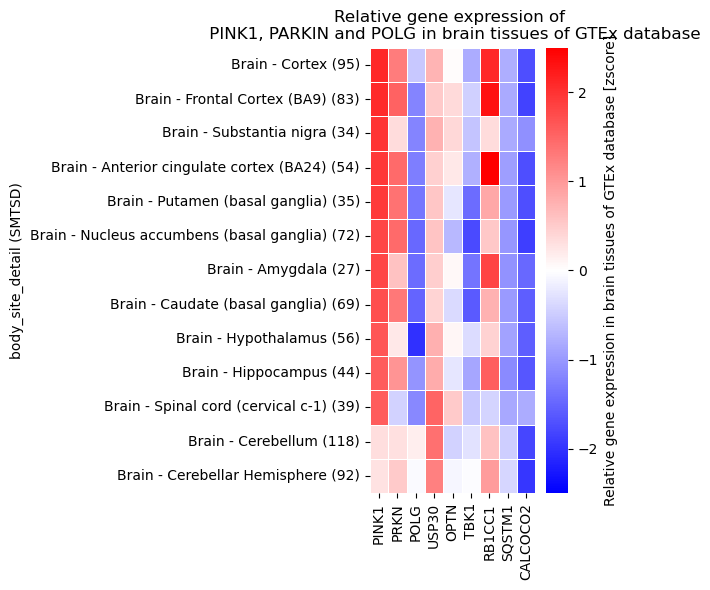

In [84]:
plt.subplots(figsize=(6,6))

seaborn.heatmap(df_subg_Brain, cmap="bwr", linewidths=.5, center=0, vmin=-2.5, vmax=2.5,
               cbar_kws={'label': 'Relative gene expression in brain tissues of GTEx database [zscore]'})
plt.title('Relative gene expression of \n PINK1, PARKIN and POLG in brain tissues of GTEx database')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()


# title_file = 'hm_brain_subsite_expression'
# plt.savefig(output_file_directory+path2+title_file+'_.svg')

plt.show()